<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [22]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [23]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [24]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable



## 4.1 Boxplot of Median Value of Owner Occupied Homes


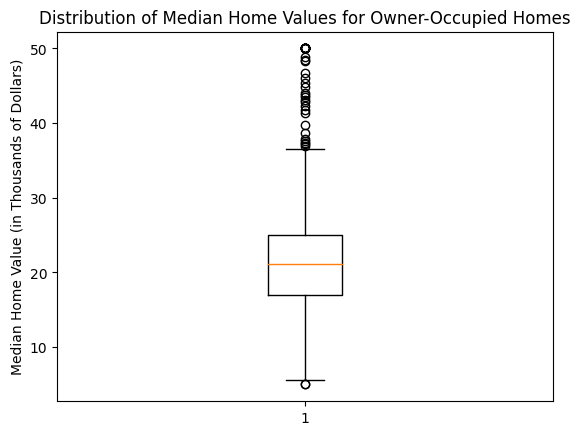

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(boston_df['MEDV'],)
plt.title('Distribution of Median Home Values for Owner-Occupied Homes')
plt.ylabel('Median Home Value (in Thousands of Dollars)')
plt.show()

In the boxplot analysis of MEDV, it appears that there are some outliers with values exceeding 40. These data points stand out as potential anomalies or extreme values in the distribution of median home values, and may warrant further investigation.

## 4.2 A Bar Plot for the Charles River Variable


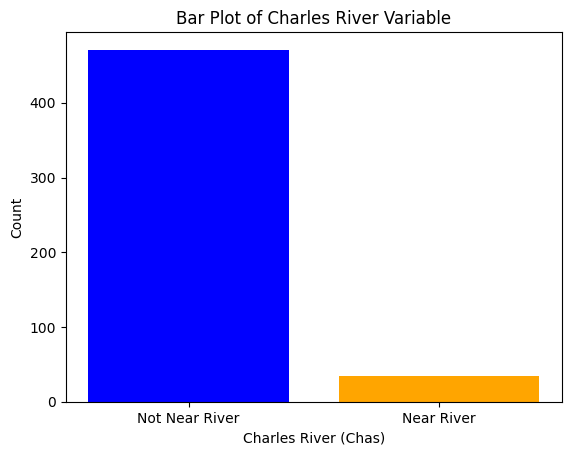

Index([0.0, 1.0], dtype='float64', name='CHAS')

In [26]:
chas_counts = boston_df['CHAS'].value_counts()


plt.bar(chas_counts.index, chas_counts.values, color=['blue', 'orange'])


plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (Chas)')
plt.ylabel('Count')
plt.xticks(chas_counts.index, labels=['Not Near River', 'Near River'])
plt.show()
chas_counts.index

 Index([0.0, 1.0], dtype='float64', name='CHAS') The barplot of the Charles River suggests that a significant proportion of the dataset corresponds to areas located away from the Charles River.

## 4.3 Boxplot of MEDV vs. AGE Group


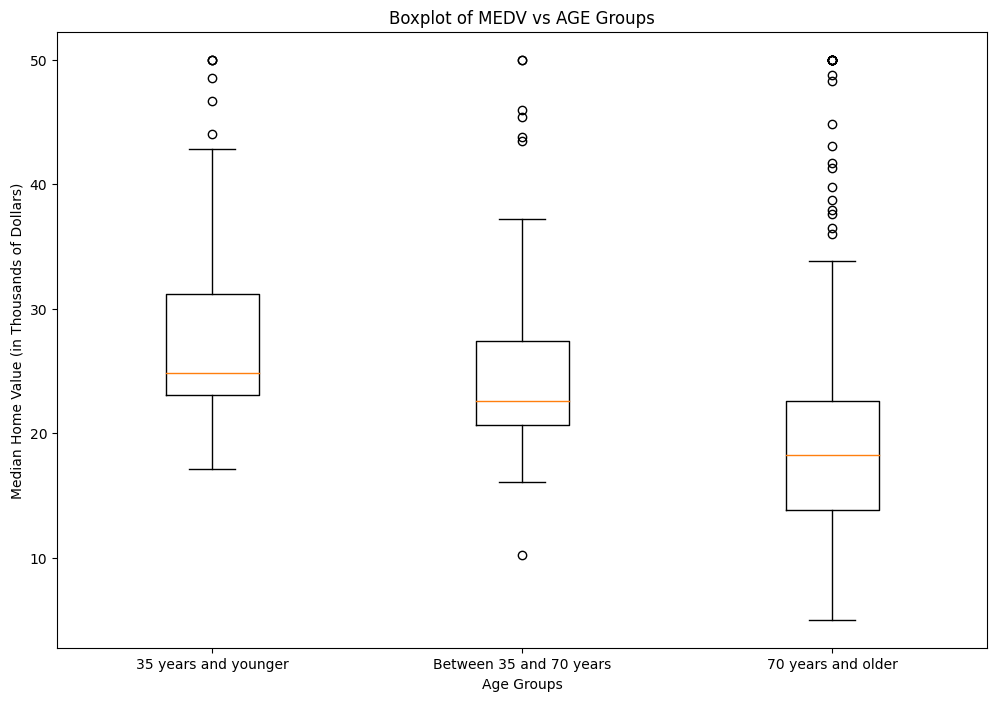

In [27]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, float('inf')]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Create a boxplot
plt.figure(figsize=(12, 8))
plt.boxplot([boston_df[boston_df['AGE_Group'] == label]['MEDV'] for label in labels], labels=labels)

# Customize the boxplot (optional)
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Groups')
plt.ylabel('Median Home Value (in Thousands of Dollars)')
plt.show()

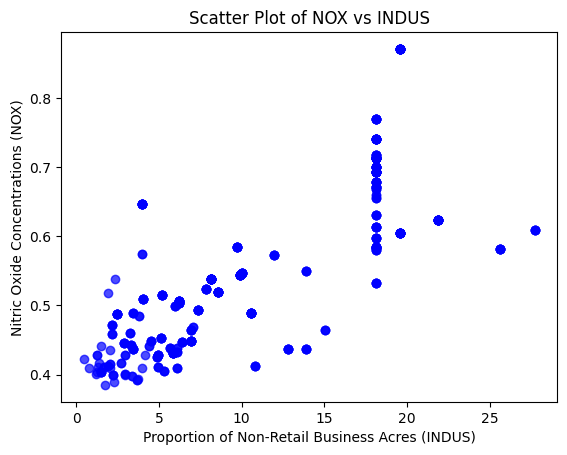

In [28]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue', alpha=0.7)

# Customize the scatter plot (optional)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')

# Show the plot
plt.show()

#### 4.4.1 Analysis of NOX vs. INDUS Scatter Plot
The scatter plot shows a positive relationship between the concentration of nitric oxides (NOX) and the proportion of non-retail business acres per town (INDUS). This indicates that towns with a higher proportion of non-retail business acres tend to have higher concentrations of nitric oxides.

This trend suggests that industrial and commercial activities, which are typically associated with non-retail business acres, may contribute to increased NOX emissions. The relationship highlights the potential impact of industrial activities on air quality.

However, the plot also shows some dispersion in the data, indicating that other factors may influence NOX concentrations. Further investigation into these factors would be necessary to fully understand the causes of variability in NOX levels across different towns.

## 4.5 Distribution of Pupil to Teacher Ratio


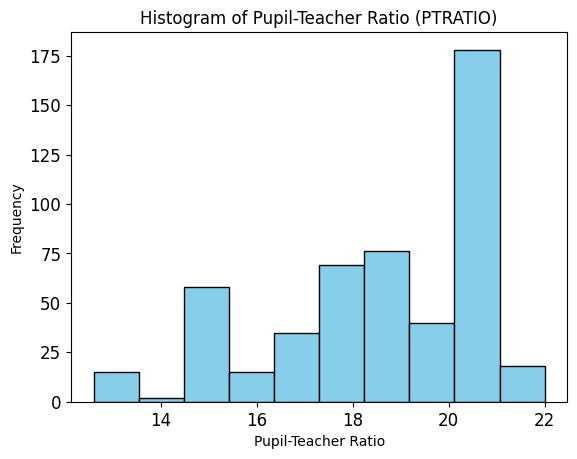

In [29]:
plt.hist(boston_df['PTRATIO'], bins=10, color='skyblue', edgecolor='black')

# Customize the histogram (optional)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

In [30]:
frequencies = boston_df['PTRATIO'].value_counts().reset_index().rename(columns={'count': 'Count'})


total_values = sum(frequencies['Count'])
frequencies['Percentage'] = (frequencies['Count'] / total_values) * 100

frequencies

,PTRATIO,Count,Percentage
0,20.2,140,27.667984
1,14.7,34,6.719368
2,21.0,27,5.335968
3,17.8,23,4.545455
4,19.2,19,3.754941
5,17.4,18,3.557312
6,18.6,17,3.359684
7,19.1,17,3.359684
8,18.4,16,3.162055
9,16.6,16,3.162055


## 5. Use the appropriate tests to answer the questions provided


5.1 Is there a significant difference in median value of houses bounded by the Charles river or not?
State the hypothesis
H_0:µ_1=µ_2  ("there is no difference in median value of houses bounded by the Charles river")
H_1:µ_1≠µ_2  ("there is a difference in median value of houses bounded by the Charles river")

We will be performing 2 tests:

Levene's test - Levene's test is used to assess the equality of variances for a variable calculated for two or more groups.
T-Test - A t-test is a statistical test used to compare the means of two groups to determine if they are significantly different from each other
Interpretation
Levene's Test Result:

P-value >= 0.05: Variances are equal, proceed with standard t-test.
P-value < 0.05: Variances are not equal, proceed with Welch's t-test.
T-test Result:

P-value < 0.05: There is a significant difference in the median value of houses bounded by the Charles River.
P-value >= 0.05: There is no significant difference in the median value of houses bounded by the Charles River.

In [31]:
### LEVENE TEST ###
# Let's perform Levene's test to check test significance
parameter_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
parameter_2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

levene_stat, levene_p_value = stats.levene(parameter_1, parameter_2, center = 'mean')
print(f"Levene's Statistics: {round(levene_stat, 6)}")
print(f"Levene's P-Value : {round(levene_p_value, 6)}")

### T-TEST ###
# Perform the independent t-test (Welch's t-test if variances are unequal)
if levene_p_value >= 0.05:
  print("\nP-value >= 0.05: Variances are equal, proceed with standard t-test.")
  t_stat, t_p_value = stats.ttest_ind(parameter_1, parameter_2, equal_var=True)
else:
  print("\nP-value < 0.05: Variances are not equal, proceed with Welch's t-test.")
  t_stat, t_p_value = stats.ttest_ind(parameter_1, parameter_2, equal_var=False)

print(f"\nIndependent t-test statistic: {round(t_stat, 6)}")
print(f"Independent t-test p-value: {round(t_p_value, 6)}")

Levene's Statistics: 8.751905
Levene's P-Value : 0.003238

P-value < 0.05: Variances are not equal, proceed with Welch's t-test.

Independent t-test statistic: 3.113291
Independent t-test p-value: 0.003567


### Conclusion of T test:
With a p-value of 0.003567 from the Welch's t-test, which is less than the typical significance level of 0.05, we reject the null hypothesis.

Therefore, we can conclude that there is a significant difference in the median value of houses bounded by the Charles River compared to those not bounded by the river.

5.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
State the hypothesis
H_0:µ_1=µ_2=µ_3  : The three population medians are equal
H_1:  At least one of the medians differ
We discretized our data into 3 age groups stored in the column AGE_group with age groups:

35 years and younger
Between 35 and 70 years
70 years and older

In [35]:
### LEVENE TEST ###
# Test for equality of variance
age_group1 = boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV']
age_group2 = boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV']
age_group3 = boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']

levene_stat_age, levene_p_value_age = stats.levene(age_group1, age_group2, age_group3, center = 'mean')
print(f"Levene's Statistics: {round(levene_stat_age, 6)}")
print(f"Levene's P-Value : {round(levene_p_value_age, 6)}")

### ANOVA-TEST ###
# Check if Levene's test is significant
if levene_p_value_age >= 0.05:
    print("\nPerform standard ANOVA if variances are equal")
    anova_stat_age, anova_p_value_age = stats.f_oneway(age_group1, age_group2, age_group3)
    print(f"\nANOVA Statistic: {round(anova_stat_age, 6)}")
    print(f"ANOVA P-Value: {anova_p_value_age}")
else:
    print("\nPerform Welch's ANOVA if variances are unequal")
    welch_anova_stat_age, welch_anova_p_value_age = stats.f_oneway(age_group1, age_group2, age_group3, equal_var=False)
    print(f"\nWelch's ANOVA Statistic: {round(welch_anova_stat_age, 6)}")
    print(f"Welch's ANOVA P-Value: {welch_anova_p_value_age}")

Levene's Statistics: 2.78062
Levene's P-Value : 0.062953

Perform standard ANOVA if variances are equal

ANOVA Statistic: 36.40765
ANOVA P-Value: 1.7105011022702984e-15


### Conclusion of ANOVA test
The standard ANOVA (Analysis of Variance) yielded a highly significant p-value (p < 0.001). This indicates that there is a significant difference in median values of houses (MEDV) among the different age groups (AGE_group).We reject the null Hypothesis of equal medians.

Based on the results of the one-way ANOVA, we found a significant difference in median values of houses (MEDV) among the different proportions of owner-occupied units built prior to 1940 (AGE) categories (F-statistic = [36.40765], p-value = [1.7105011022702984e-15]).

This suggests that the age of the houses has an impact on their median values.

##### 5.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)



#### State the hypothesis:
H_0:  there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

H_1:  there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#### Interpretation
If the Pearson correlation coefficient is close to 0 (e.g., between -0.1 and 0.1), it suggests no linear relationship.

If the p-value is greater than the chosen significance level (e.g., 0.05), we fail to reject the null hypothesis of no correlation.

In [37]:
# Calculate Pearson correlation coefficient
pearson_corr, pearson_p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {pearson_p_value}")

Pearson Correlation Coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


### Conclusion of Pearson's Correlation
With a Pearson correlation coefficient of approximately 0.764 and a very small p-value (close to zero), we can conclude that there is a strong positive linear relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

In simpler terms, the data suggests that as the proportion of non-retail business acres per town increases, nitric oxide concentrations also tend to increase.

This correlation is statistically significant, indicating that it is unlikely to have occurred by random chance. 
##### Therefore, we reject the null hypothesis of no correlation between the two variables.

##### 5.4 What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?

State the Hypothesis

H_0:β1  = 0 There is no effect of the weighted distance to the employment centers on the median value of owner-occupied homes.

H_1:β1 ≠ 0  There is an effect of the weighted distance to the employment centers on the median value of owner-occupied homes.

In [38]:
# Prepare the data
X = boston_df['DIS']  # Independent variable (DIS)
y = boston_df['MEDV']  # Dependent variable (MEDV)

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        14:40:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

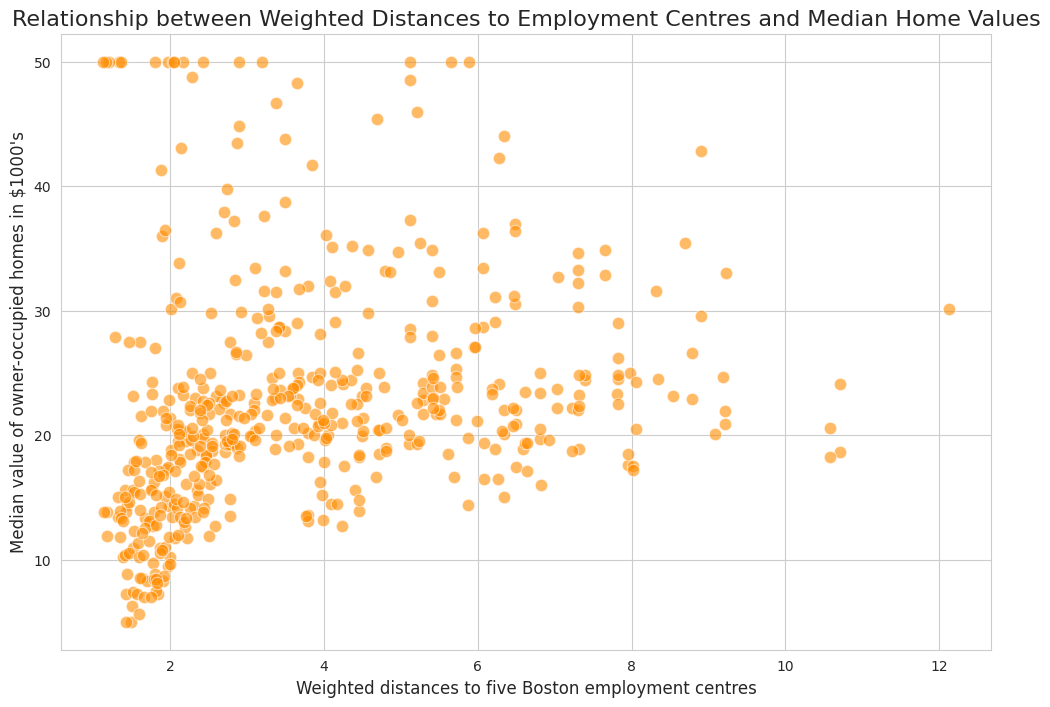

In [39]:
# Set the style
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=boston_df, x='DIS', y='MEDV', color='darkorange', s = 80, alpha=0.6)

# Add labels and title
plt.xlabel('Weighted distances to five Boston employment centres', fontsize=12)
plt.ylabel("Median value of owner-occupied homes in $1000's", fontsize=12)
plt.title('Relationship between Weighted Distances to Employment Centres and Median Home Values', fontsize=16)

# Show plot
plt.show()

#### Conclusion of the Regression Analysis

There is a statistically significant positive relationship between the weighted distance to the employment centers (DIS) and the median value of owner-occupied homes (MEDV). 
Specifically, as the weighted distance to the employment centers increases, the median value of owner-occupied homes tends to increase.

Since the p-value is less than the chosen significance level (e.g., 0.05), 
#### we reject the null hypothesis. Therefore, we conclude that there is a statistically significant linear relationship between the weighted distance to the employment centers (DIS) and the median value of owner-occupied homes (MEDV).